In [1]:
#impoting the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part-1
# Basic Exploratory steps

In [2]:
#importing the "supermarket sales Sheet1.csv dataset" 

df = pd.read_csv('supermarket sales Sheet1.csv')

In [3]:
#reading the first 5 rows of the dataset by "head() function"
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.shape # there are 1000 rows and 17 columns in the dataset

(1000, 17)

In [5]:
#checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

from the above info we can see that "Date" is display as "object Datatype" so we have to convert it into the datetime
Datatype

In [6]:
df['Date'].dtype #datatype of the Date

dtype('O')

In [7]:
df['Date'] = pd.to_datetime(df['Date']) #to convert it into "to_datetime" datatype

In [8]:
df['Date'].dtype

dtype('<M8[ns]')

In [9]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [10]:
df.isnull().sum() # checking for a null values

# here in the we can see that there are no null values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [11]:
df['weekday'] = df['Date'].dt.day_name() 

# adding the column of weekday from the date,as for the analysis it required,it helps us to solve the question in part-3
# Which day of the week has maximum sales? 

In [12]:
df.drop(['gross margin percentage','Invoice ID'],axis = 1) 
# as per the dataset "gross margin percentage" column has the same values so it's look like it is not required for this,
# as per the given conditions Invoice ID is also not required for the analysis 
#so that we can drop these 2 columns

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating,weekday
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,26.1415,9.1,Saturday
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,3.8200,9.6,Friday
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,16.2155,7.4,Sunday
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,23.2880,8.4,Sunday
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,30.2085,5.3,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,2.0175,6.2,Tuesday
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,48.6900,4.4,Saturday
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,1.5920,7.7,Saturday
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,3.2910,4.1,Friday


In [13]:
df.corr() # correlation analysis of dataset

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


<AxesSubplot:>

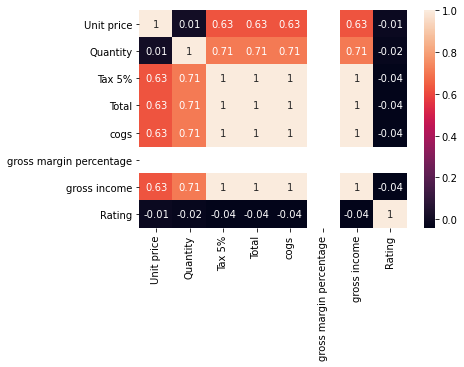

In [14]:
# lets visualize this correlation

sns.heatmap(np.round(df.corr(),2), annot=True)

# PART-2

# Q1) Is your supermarket more popular with males or females?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Female    501
Male      499
Name: Gender, dtype: int64

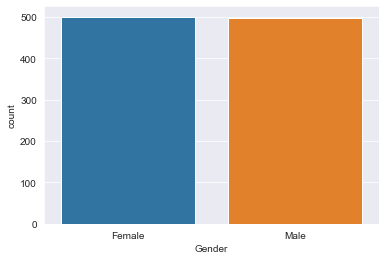

In [15]:
sns.set_style("darkgrid")
sns.countplot(df['Gender'])
df['Gender'].value_counts()

# Q2) What does the customer rating look like and can you also comment on its skewness?                 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'customer ratings'}, xlabel='Rating', ylabel='Density'>

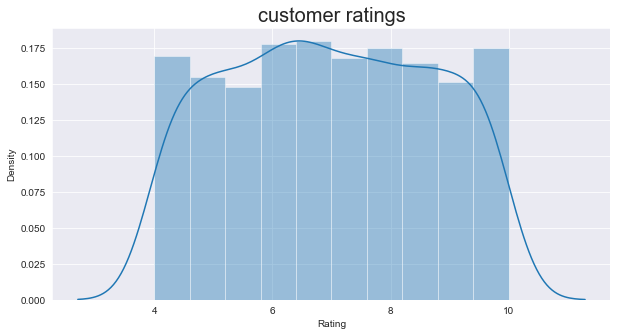

In [16]:
plt.figure(figsize = (10,5))
plt.title('customer ratings',size=20)
sns.set_style("darkgrid")
sns.distplot(df['Rating'])

Here  from  the  output  or from  the visualization  we  can  see  that  the  "Rating"  is  uniformly  distributed , there  is  no  skewness  on  the  right  or  left  side  of  the  distribution.

# Q3) What can you say about the aggregate sales across the branches?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


A    340
B    332
C    328
Name: Branch, dtype: int64

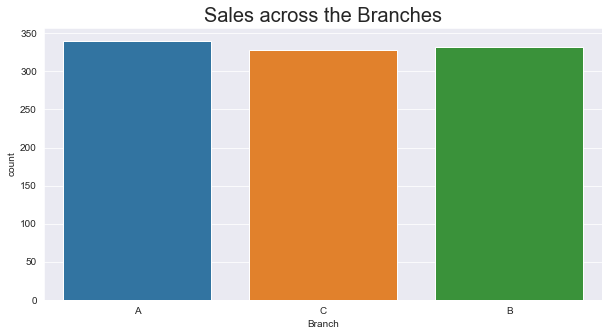

In [17]:
plt.figure(figsize = (10,5))
plt.title('Sales across the Branches',size=20)
sns.set_style("darkgrid")
sns.countplot(df['Branch'])
df['Branch'].value_counts()

"By comparing the Sales across the 3 branches,there is not much difference in sales of A, B & C Branches.But the sales in the Branch 'A' is little more as compare to 'B' & 'C'

# Q4) Which is the most popular payment method used by customers?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

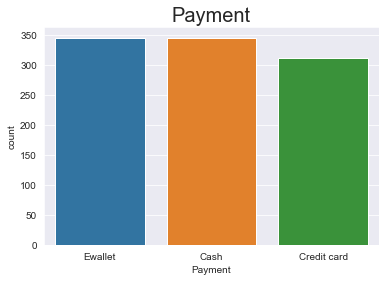

In [18]:
sns.set_style("darkgrid")
sns.countplot(df['Payment']).set_title("Payment",size = 20)
df['Payment'].value_counts()

From the output we can see or visualize that,Ewallet and Cash payments methods are more popular in this supermarket.while Credit card payment method is less as compared to Ewallet and Cash.

# PART - 03

# Q1) Does gross income affect customer ratings? 

<AxesSubplot:title={'center':'relationship between Rating and income'}, xlabel='Rating', ylabel='gross income'>

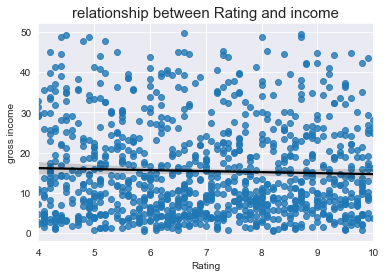

In [19]:
plt.title("relationship between Rating and income",size = 15)
sns.regplot(data=df,x='Rating', y='gross income',line_kws={"color": "black"})

From the above visual we can see that the scatterplots and regression line or trend line is flat,and their is no relationship between "rating" and "gross income".
From this we can say that gross income does not effect the customer ratings.

# Q2) Which is the most profitable branch? 

In [20]:
# here we are grouping the branches with the gross income,and in the output we get the values of each branches(A,B,C)

profit = df.groupby('Branch')['gross income'].sum()
profit

Branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: gross income, dtype: float64

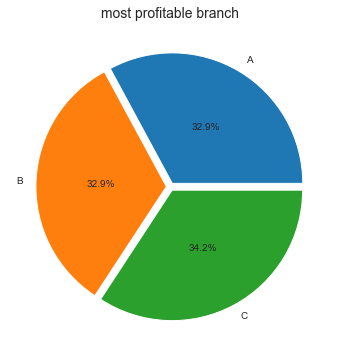

In [21]:
# here we are giving the size of the subplots
pie, ax = plt.subplots(figsize=[20,6]) 
labels = profit.keys()
plt.pie(x=profit, autopct="%.1f%%",explode=[0.03]*3,labels=labels, pctdistance=0.5)
plt.title("most profitable branch", fontsize=14);

From the above plot we can see that the Branch "c" has more percentage of gross income as compare to "A" & "c", so the most profitable branch is "c".But looking into the plot that there is not much difference in gross income by Branches at an avg level.
As earlier we have seen that branch "A" is slightly higher than "B & C" in terms of sales, and now "C" is higher than the rest in terms of gross income or profit  

# Q3) How is the relationship between Gender and Gross income? 

In [22]:
# it is also similar to the branch analysis
# again we can do the same method by using groupby

income = df.groupby('Gender')['gross income'].sum()
income

Gender
Female    7994.425
Male      7384.944
Name: gross income, dtype: float64

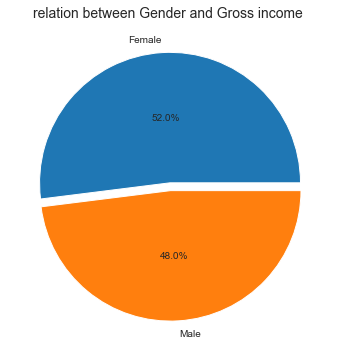

In [23]:
pie, ax = plt.subplots(figsize=[20,6]) 
labels = income.keys()
plt.pie(x=income, autopct="%.1f%%",explode=[0.03]*2,labels=labels, pctdistance=0.5)
plt.title("relation between Gender and Gross income ", fontsize=14);

it is similar to the branch analysis,female customer has spent more or the higher gross income has came from female customers.
we can also ans this by using the boxplot also as shown below 

Text(0.5, 1.0, 'relation between Gender and Gross income ')

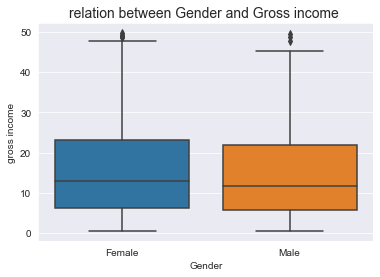

In [24]:
sns.boxplot(x=df['Gender'], y=df['gross income'])
plt.title("relation between Gender and Gross income ", fontsize=14)
# from the output we can see that female customers has spent more in the 75th percentile 

# Q4) Can you see any time trend in gross income?

<AxesSubplot:xlabel='Date', ylabel='gross income'>

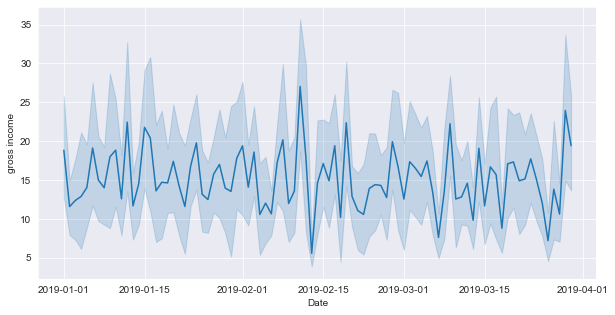

In [30]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date',y='gross income',data = df)

As we can see that there is no particular time trend is observed except for some days when the gross income is pretty high or pretty low.

# Q5) Which product line helps you generate the most income? 

In [32]:
df_product= df.groupby(['Product line'],as_index=False)[["Product line", "gross income"]
                                     ].sum().sort_values(by='gross income', ascending=False)
# grouping the values of'Product line'and
# suming up the values of "Product line" and "gross income" in the descending order.

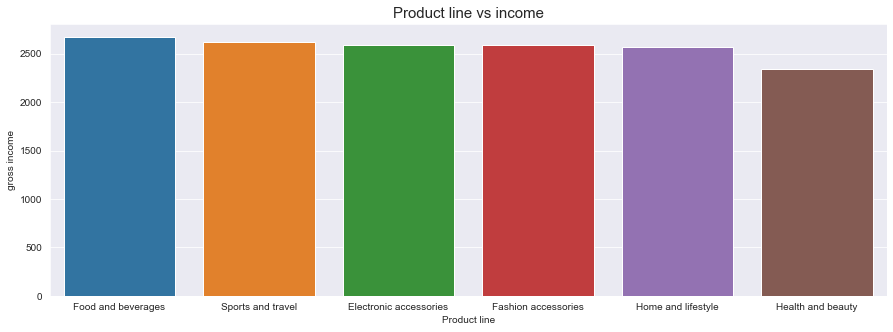

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(x='Product line', y='gross income', data=df_product)
plt.title("Product line vs income",fontsize=15)
plt.show()

"Food and beverages" and "sport & travel" has the highest gross income

# Q6) What is the spending pattern of both males and females, meaning in which category do they spend more?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

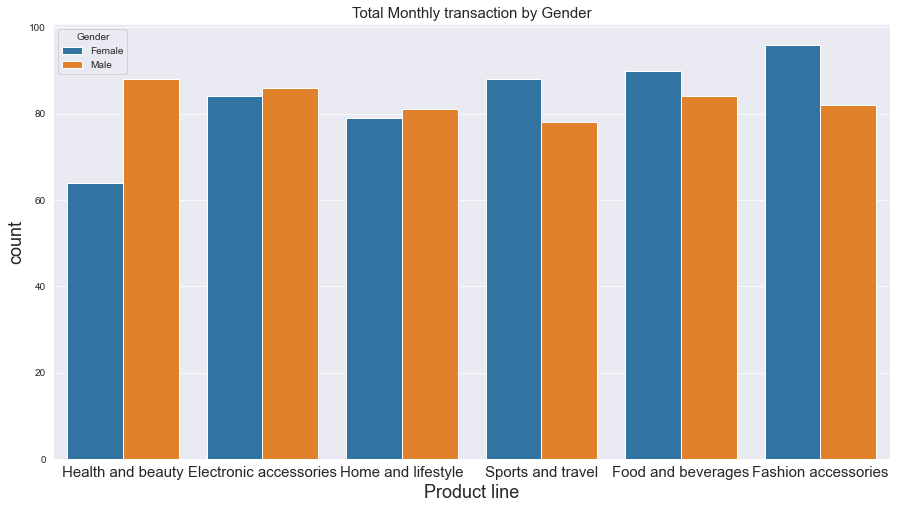

In [34]:
plt.figure(figsize=(15, 8))
plt.title('Total Monthly transaction by Gender',size=(15))
plt.xticks(size=15)
sns.countplot(df['Product line'], hue = df.Gender)
plt.xlabel('Product line',size=18)
plt.ylabel('count',size=18)

Females spend on 'fashion accessories' the most and for males it is 'Health and beauty'. Females also spend more on 'Sports and travel'.

# Q7) How many products are bought by customers?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity', ylabel='count'>

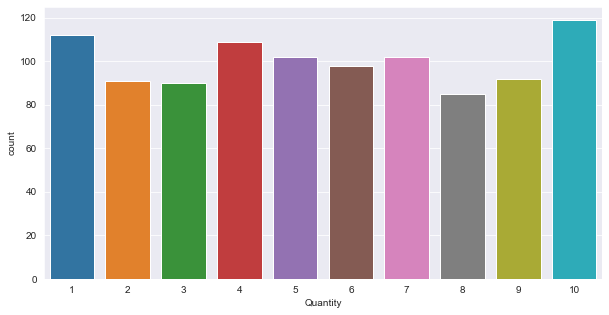

In [35]:
plt.figure(figsize = (10,5))
sns.countplot(df['Quantity'])

As we can see that most of the customers bought 10 quantities

# Q8) Which day of the week has maximum sales?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Saturday     164
Tuesday      158
Wednesday    143
Friday       139
Thursday     138
Sunday       133
Monday       125
Name: weekday, dtype: int64

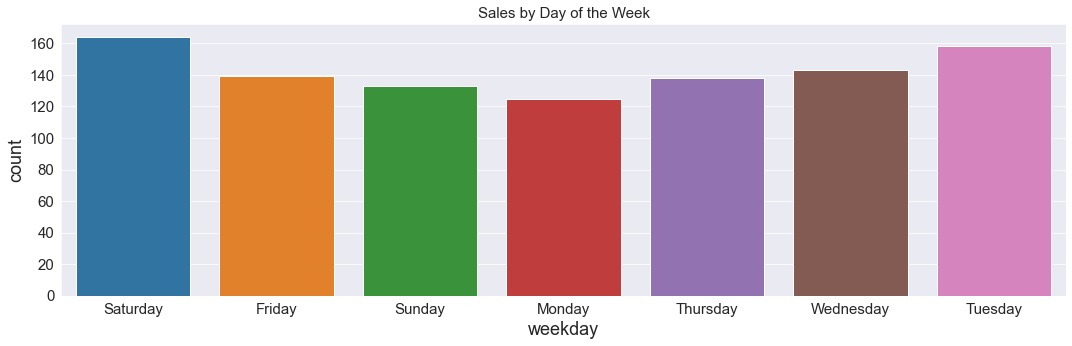

In [36]:
plt.figure(figsize = (18,5))
plt.title('Sales by Day of the Week',fontsize=15)
plt.xticks(size=15),plt.yticks(size=15)
sns.countplot(df['weekday'])
plt.xlabel('weekday',size=18)
plt.ylabel('count',size=18)
df['weekday'].value_counts()

From the output we can visualize that,the sales are high on saturday's because it is weekend day, and monday has the lowest sales as compare to rest of the day's, because its a working weekday starts monday. 

# Q9) Which hour of the day is busiest? 

To answer this question first we have to convert time in to hours,by that it is easy to visualize that at what time the sales are high 

In [37]:
df['Time'] = pd.to_datetime(df['Time']) 

#converting the time into datetime dtype

In [38]:
# from the time we are extracting the hours

df['Hour'] = (df['Time']).dt.hour

In [39]:
#finding the unique values of the hour

df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int64)

<AxesSubplot:xlabel='Hour', ylabel='Quantity'>

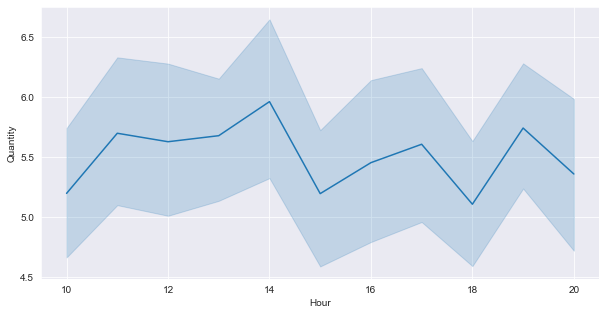

In [40]:
#by using the line plot we see the peakhours of the sales

plt.figure(figsize=(10,5))
sns.set_style(style = "darkgrid")
sns.lineplot(x='Hour',y='Quantity',data = df)

From the above visual it is clear that at 14th hour the sales are higher(i,e.., at afternoon 2pm the sales are higher)

# Q10) Which product line should your supermarket focus on? 

For this question we can create two plots by separately or by making subplots

<AxesSubplot:xlabel='Product line', ylabel='Quantity'>

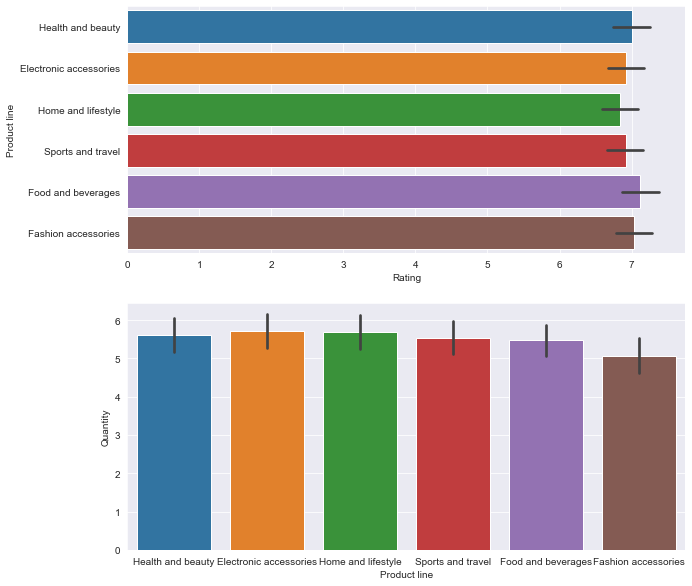

In [41]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)    # (2,1,1) indicates that "2 rows","1 column","1st position" as we can see in the output
sns.set_style(style = "darkgrid")
sns.barplot(y = df['Product line'], x = df['Rating'],data=df)
plt.subplot(2,1,2)     # (2,1,2) indicates that "2 rows","1 column","2nd position"
sns.barplot(x='Product line',y='Quantity',data = df)

From the 1st fig , the rating for ‘fashion accessories’ and ‘food and beverages’ is high , but quantity is low(we can see from fig2). Hence, supply for these products need to be increased.

# Q11) Which city should be chosen for expansion and what products should be focussed on?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1440x504 with 0 Axes>

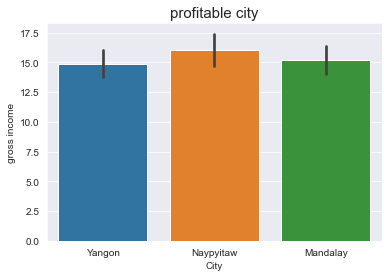

<Figure size 1440x504 with 0 Axes>

In [42]:
x=df['City']
y=df['gross income']
sns.barplot(x,y).set_title("profitable city",fontsize=15)
plt.figure(figsize=(20,7))

since the city  ‘Naypyitaw’ has higher income,so we have to choose this city for expansion.
Here below lets see, what products should be focussed on

Text(0, 0.5, 'count')

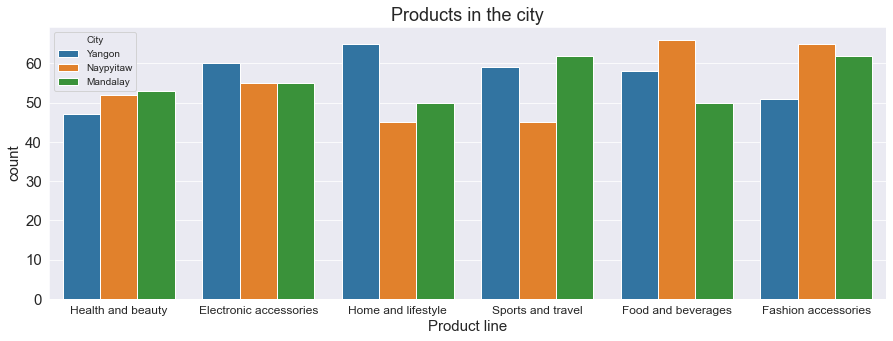

In [43]:
plt.figure(figsize=(15,5))
plt.title("Products in the city",fontsize = 18)
plt.xticks(size=12),plt.yticks(size=15)
sns.countplot(x='Product line',hue = "City",data = df)
plt.xlabel('Product line',size=15)
plt.ylabel('count',size=15)

"Fashion accessories" and "food and beverages" are the most sold product in Naypyitaw and these products should be focused on expansion, as well as we have to focus on "electronic accessories" also.

# practice codes for some of the above question

Q1) Does gross income affect customer ratings?

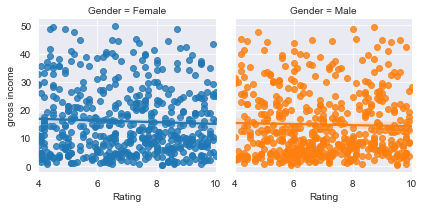

In [44]:
# visualising the data by separating the customers(male and female) ratings

g = sns.FacetGrid(df,  hue= "Gender",col="Gender")
g.map(sns.regplot, "Rating", "gross income")
#sns.lmplot(x='Rating', y='gross income',col = "Gender",hue = "Gender",data=df)

Part-2 
Q2) What does the customer rating look like and is it skewed?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


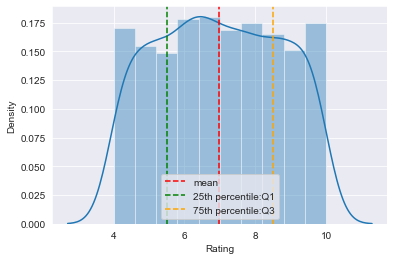

In [45]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['Rating'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

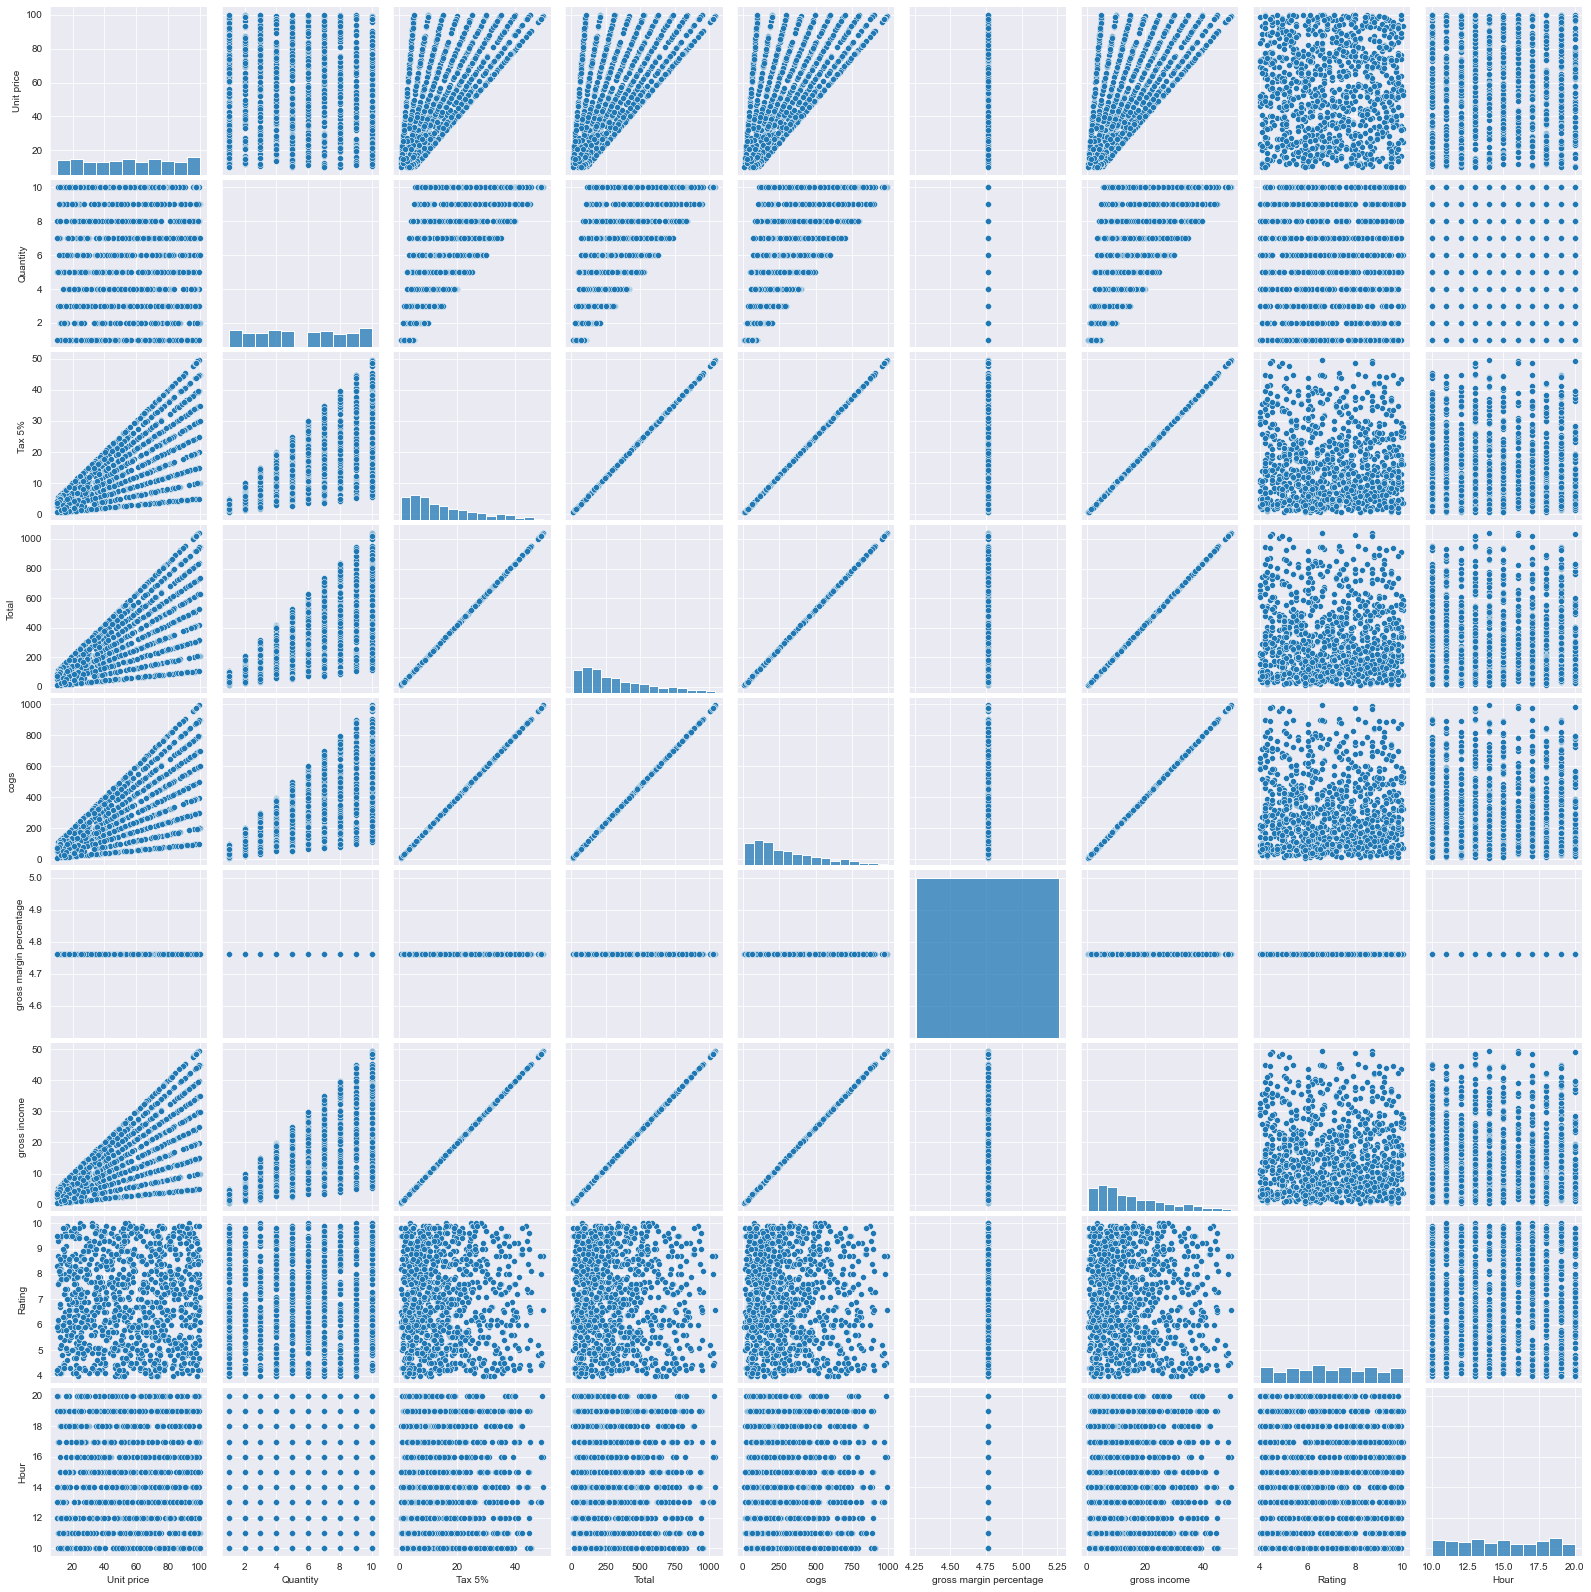

In [46]:
sns.pairplot(df)
# by this we can visualise the data by every columns but in the larger datasets it is not possible